In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sweDataset import sweDataset
import models
import tool
import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

In [3]:
folder_path = '/Users/yz6622/Desktop/IRP/dataset/swiss_station/Preprocessed_data/'

In [4]:
# Define variables
train_file_path = folder_path + 'train.csv'
test_file_path = folder_path + 'test.csv'
var = ['HS', 'temperature', 'precipitation', 'snowfall', 'solar_radiation', 'rain', 'month']
ts = 30 


In [5]:
def train(train_file_path, test_file_path, var, hidden_dims=[60,30], num_epochs=60,  step_size=10, gamma=0.5, ts=30):    
    # Data preprocess
    dataset = sweDataset(train_file_path, test_file_path, var, ts)
    train_loader, val_loader, test_loader = dataset.get_data_loaders()

    # Build model
    model = models.LSTM(input_dim=len(var), hidden_dims=hidden_dims, num_epochs=num_epochs)    
    criterion = nn.MSELoss()
    optimiser = Adam(model.parameters(), lr=0.001)
    scheduler = StepLR(optimiser, step_size=step_size, gamma=gamma)

    # Train
    train_losses, val_losses = models.train_model(model, ts, len(var), train_loader, val_loader, optimiser, criterion, scheduler)

    # Plot the loss function
    tool.plot_loss(train_losses, val_losses)

    # Evaluate
    tool.evaluate_model(test_loader, model, dataset)
    
    return model

Epoch 1/100, Train Loss: 0.004301162097569341, Val Loss: 0.002605845106710559
Epoch 2/100, Train Loss: 0.002586458791639743, Val Loss: 0.0026348657057869364
Epoch 3/100, Train Loss: 0.0025281823169393297, Val Loss: 0.0026559042589457417
Epoch 4/100, Train Loss: 0.002487366172378352, Val Loss: 0.002653587873748405
Epoch 5/100, Train Loss: 0.002450174821860575, Val Loss: 0.002612090732324647
Epoch 6/100, Train Loss: 0.0024132012692300716, Val Loss: 0.0025640115135421274
Epoch 7/100, Train Loss: 0.002373827933542999, Val Loss: 0.0025783434487738114
Epoch 8/100, Train Loss: 0.0023385909509405717, Val Loss: 0.002544357095355532
Epoch 9/100, Train Loss: 0.0023062245269814497, Val Loss: 0.0025594255973877453
Epoch 10/100, Train Loss: 0.002283030903469774, Val Loss: 0.002559941935497149
Epoch 11/100, Train Loss: 0.0021465696230173743, Val Loss: 0.0023605413784025205
Epoch 12/100, Train Loss: 0.0021272754361573282, Val Loss: 0.002361412693420338
Epoch 13/100, Train Loss: 0.0021077391140207156, 

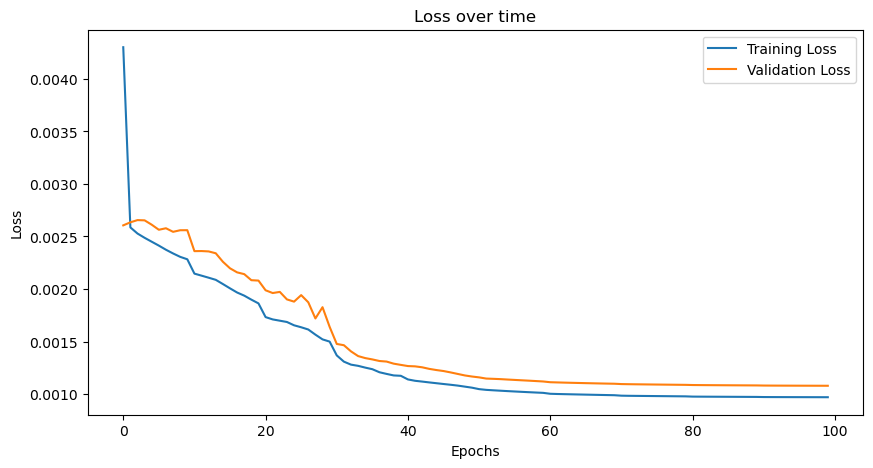

Root Mean Squared Error on Test Data: 8.780445
Kling-Gupta efficiency on Test Data: 0.9335875341075105
Mean Absolute Error on Test Data: 4.948019
R2 Score on Test Data: 0.9553333570191576


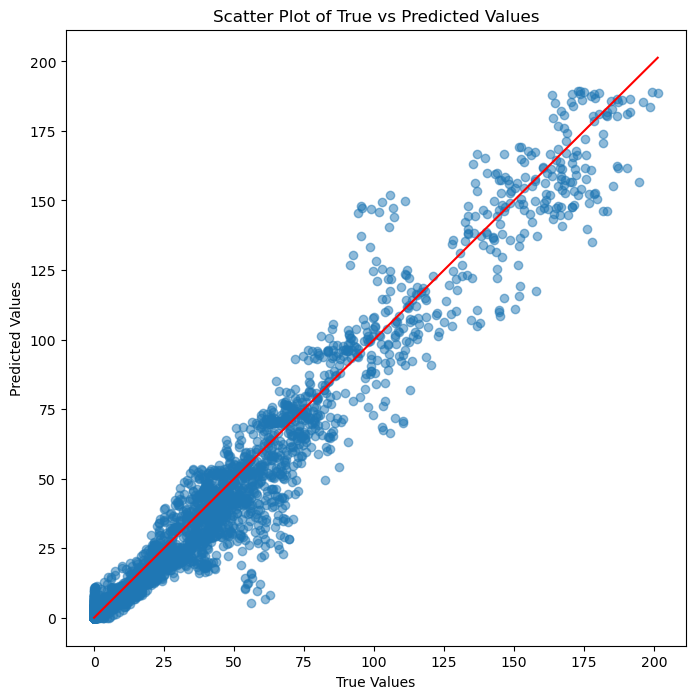

In [7]:
globalModel = train(train_file_path, test_file_path, var, hidden_dims=[60,30], num_epochs=100,  step_size=10, gamma=0.5, ts=30)

Epoch 1/100, Train Loss: 0.00402610597769976, Val Loss: 0.0028177807074604047
Epoch 2/100, Train Loss: 0.0028096706952148664, Val Loss: 0.002793694525808189
Epoch 3/100, Train Loss: 0.0027512954495159604, Val Loss: 0.0027748296099753523
Epoch 4/100, Train Loss: 0.0027232418014653337, Val Loss: 0.0027478839098777396
Epoch 5/100, Train Loss: 0.0027062211067018106, Val Loss: 0.002740248832979625
Epoch 6/100, Train Loss: 0.0026928775494031165, Val Loss: 0.0027310637085885274
Epoch 7/100, Train Loss: 0.0026794830226150768, Val Loss: 0.002718742056136054
Epoch 8/100, Train Loss: 0.0026605480985284428, Val Loss: 0.002706863367497648
Epoch 9/100, Train Loss: 0.0026446678972400248, Val Loss: 0.002698833041409639
Epoch 10/100, Train Loss: 0.0026309488332098294, Val Loss: 0.0026868918093121874
Epoch 11/100, Train Loss: 0.002505478425314345, Val Loss: 0.0026573719679394065
Epoch 12/100, Train Loss: 0.0025023032805099126, Val Loss: 0.002656251787767047
Epoch 13/100, Train Loss: 0.002499439742102584

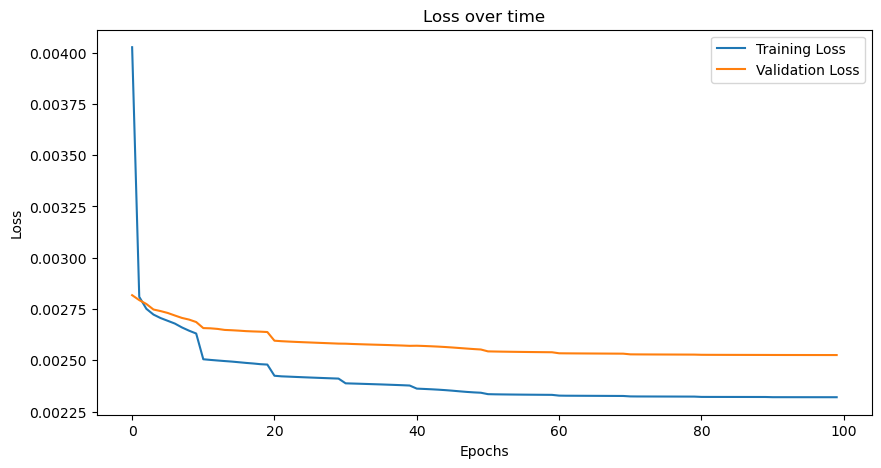

Root Mean Squared Error on Test Data: 6.998446
Kling-Gupta efficiency on Test Data: 0.9283563759001665
Mean Absolute Error on Test Data: 4.324331
R2 Score on Test Data: 0.9716238510035586


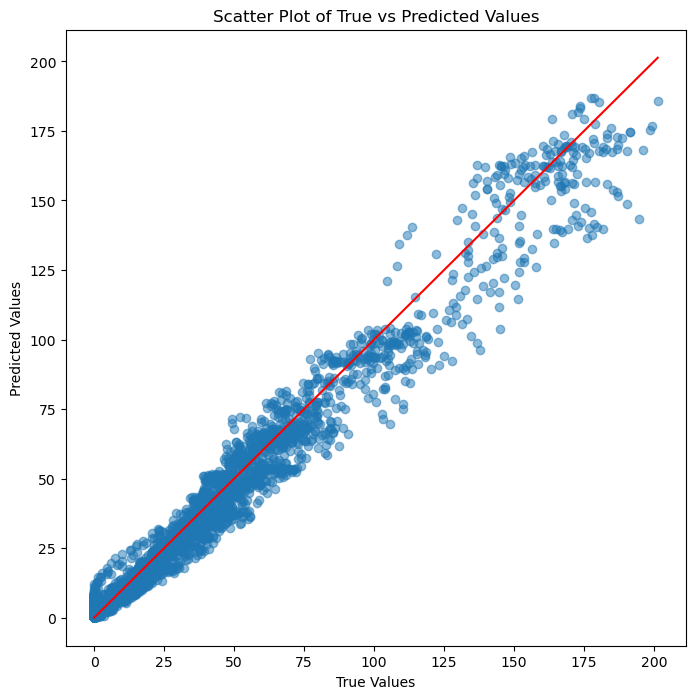

In [11]:
globalModel = train(train_file_path, test_file_path, ['HS'], hidden_dims=[60,30], num_epochs=100,  step_size=10, gamma=0.5, ts=30)

In [12]:
torch.save(globalModel.state_dict(), f"/Users/yz6622/Desktop/IRP/models/global_model.pth")

In [14]:
print(globalModel.state_dict().keys())

odict_keys(['lstm_layers.0.weight_ih_l0', 'lstm_layers.0.weight_hh_l0', 'lstm_layers.0.bias_ih_l0', 'lstm_layers.0.bias_hh_l0', 'lstm_layers.1.weight_ih_l0', 'lstm_layers.1.weight_hh_l0', 'lstm_layers.1.bias_ih_l0', 'lstm_layers.1.bias_hh_l0', 'fc.weight', 'fc.bias'])


In [7]:
model_dict = torch.load("/Users/yz6622/Desktop/IRP/models/global_model.pth")